In [1]:
%run 1_Data_scraping_and_parsing.ipynb

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Examining trends

First, we recreate the list of headlines constructed in the previous section by reading the data from the saved text files. This is much faster than scraping the headlines all over again. Again, we initialize the list with a null object in order to keep the indexing scheme consistent.

In [2]:
headline_list = [None]

In [3]:
def open_headlines(w):
    try:
        f = open('data/week{}.txt'.format(w), 'r', encoding='utf-8')
        try:
            headline_list.append(f.read())  # adds the content of each text file to the end of the list
        finally:
            f.close()
    except IOError:
        pass

In [4]:
for i in range(1, 67):
    open_headlines(i)

With the headlines now loaded, we can examine how often a presidential candidate was mentioned each week. To do so, we first generate a list with each candidate's name stored as a string.

In [5]:
candidates = 'Trump Kasich Cruz Rubio Carson Bush Gilmore Christie Fiorina Santorum Paul Huckabee Pataki Graham Jindal Walker Perry Clinton Sanders O’Malley Lessig Chafee Webb'.split()

For each candidate, we count the number of appearances of his or her last name in each week's headlines. This count is then divided by the total number of words for that week so that we can see the relative frequency. These 66 values are stored in a list. A dictionary is created to save these lists. The keys of the "name_frequencies" dictionary are the candidates' last names and the values are the lists of frequencies.

In [6]:
name_frequencies = {}

for name in candidates:
    frequencies = []
    for w in range(1, 67):
        i = 0
        for word in headline_list[w].split():
            if name in word:
                i += 1
        frequencies.append(i/len(headline_list[w].split()))
    name_frequencies.update({name: frequencies})

We can then plot these frequencies as line graphs. We first create three comparisons: Ted Cruz (runner-up for the Republican nomination) against Donald Trump, Trump against Hillary Clinton, and Clinton against Bernie Sanders (runner-up for the Democratic nomination).

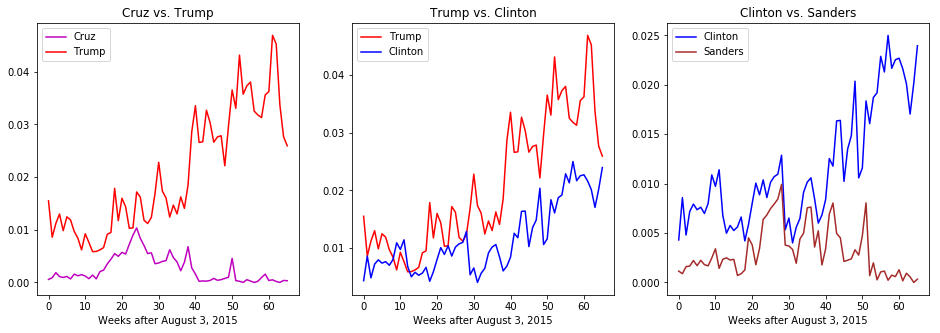

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].plot(name_frequencies['Cruz'], c='m', label='Cruz')
axes[0].plot(name_frequencies['Trump'], c='r', label='Trump')
axes[0].legend(loc=2)
axes[0].set_xlabel('Weeks after August 3, 2015')
axes[0].set_title('Cruz vs. Trump')

axes[1].plot(name_frequencies['Trump'], c='r', label='Trump')
axes[1].plot(name_frequencies['Clinton'], c='b', label='Clinton')
axes[1].legend(loc=2)
axes[1].set_xlabel('Weeks after August 3, 2015')
axes[1].set_title('Trump vs. Clinton')

axes[2].plot(name_frequencies['Clinton'], c='b', label='Clinton')
axes[2].plot(name_frequencies['Sanders'], c='brown', label='Sanders')
axes[2].legend(loc=2)
axes[2].set_xlabel('Weeks after August 3, 2015')
axes[2].set_title('Clinton vs. Sanders')

Unsurprisingly, Trump dominated the other candidates in coverage. Throughout the campaign, Trump frequently received attention for his controversial statements and his unexpected success in the Republican primaries. His coverage only increased as he won the nomination and began his general election campaign against Hillary Clinton.

Clinton entered the primaries with a significant advantage in fundraising and name recognition over her chief rival, Bernie Sanders. However, as the other Democratic candidates dropped out and Sanders was able to keep the nomination contest surprisingly close, his media coverage grew and only slightly trailed Clinton's until it became clear (around week 40, or May 2016) that he would not prevail.

Next, we create a three-way plot for John Kasich, Ted Cruz, and Marco Rubio (the last three Republican candidates to drop out) and a comparison of Rubio and Jeb Bush, who was often touted as his political mentor.

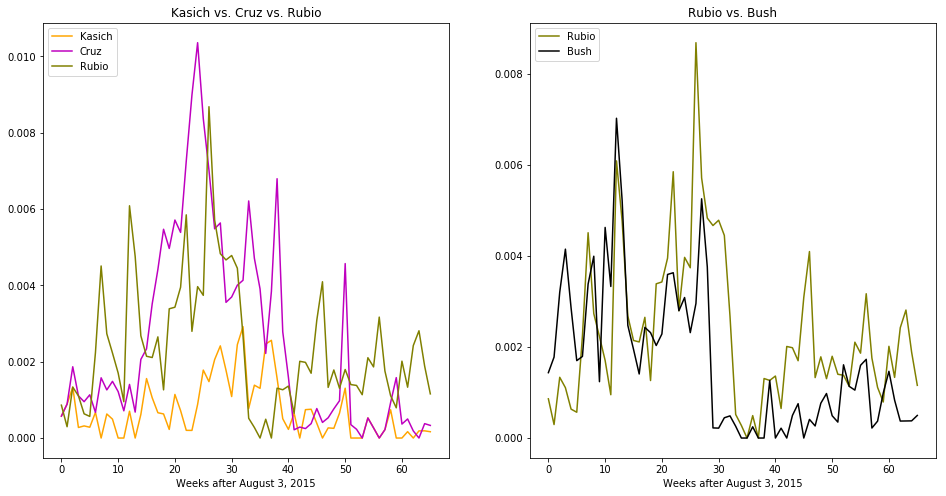

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].plot(name_frequencies['Kasich'], c='orange', label='Kasich')
axes[0].plot(name_frequencies['Cruz'], c='m', label='Cruz')
axes[0].plot(name_frequencies['Rubio'], c='olive', label='Rubio')
axes[0].legend(loc=2)
axes[0].set_xlabel('Weeks after August 3, 2015')
axes[0].set_title('Kasich vs. Cruz vs. Rubio')

axes[1].plot(name_frequencies['Rubio'], c='olive', label='Rubio')
axes[1].plot(name_frequencies['Bush'], c='black', label='Bush')
axes[1].legend(loc=2)
axes[1].set_xlabel('Weeks after August 3, 2015')
axes[1].set_title('Rubio vs. Bush')

Kasich's campaign never gained much momentum: his coverage peaked around the time of his second-place finish in New Hampshire, where he still lost to Trump by nearly 20 points. Cruz and Rubio both peaked shortly before the February 1 Iowa caucus, the first contest of the season. At the time, they (along with Bush) were considered most likely to win the nomination, despite Trump's edge in the polls.

Bush was an early favorite due to his huge financial advantage and name recognition. Before voting began, much of his coverage played up a rivalry with Rubio, an incumbent senator from Florida, where Bush was a former governor. This can be seen in their similar name frequencies until Bush's steep decline in late February 2016, when he withdrew from the race following a disappointing result in the South Carolina primary.